# Fase 2: Data Understanding

### Importar archivos parquet desde drive

Para comenzar, montaremos el drive que contiene los archivos parquet que nos proporcionará los datos para el analisis de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Importar librerías


Cargaremos las librerías necesarias previa al manipulamiento de nuestros datos.

In [ ]:
import pandas as pd
import glob

### Carga de los archivos parquet



Llamaremos a los archivos parquet que estan alojadas en nuestro drive.

In [ ]:
# Ruta de tus archivos
archivos = glob.glob('/content/drive/MyDrive/Anime Dataset/*.parquet')

# Ordenar archivos
archivos = sorted(archivos)
print("cargando")

# Cargar cada archivo en una variable con un nombre derivado del archivo
for ruta in archivos:
    # Extraer el nombre del archivo sin la ruta y la extensión
    nombre_archivo = ruta.split('/')[-1]
    nombre_variable = nombre_archivo.replace('.parquet', '')

    # Cargar el archivo en la variable
    globals()[nombre_variable] = pd.read_parquet(ruta)
    print(f"'{nombre_variable}' cargado con {len(globals()[nombre_variable])} filas")


cargando
'anime_dataset_2023' cargado con 24905 filas
'anime_filtered' cargado con 14952 filas
'final_animedataset' cargado con 35305695 filas
'user_filtered' cargado con 109224747 filas
'users_details_2023' cargado con 731290 filas
'users_score_2023' cargado con 24325191 filas


### Exploración inicial de los datos

Ahora que llamamos nuestros datos desde los archivos parquet, comenzaremos a explorar los datos observando de cada archivo.

In [ ]:
users_details_2023.head(5)

,Mal ID,Username,Gender,Birthday,Location,Joined,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
0,1,Xinil,Male,1985-03-04T00:00:00+00:00,California,2004-11-05T00:00:00+00:00,142.300003,7.37,1.0,233.0,8.0,93.0,64.0,399.0,60.0,8458.0
1,3,Aokaado,Male,NaN,"Oslo, Norway",2004-11-11T00:00:00+00:00,68.599998,7.34,23.0,137.0,99.0,44.0,40.0,343.0,15.0,4072.0
2,4,Crystal,Female,NaN,"Melbourne, Australia",2004-11-13T00:00:00+00:00,212.800003,6.68,16.0,636.0,303.0,0.0,45.0,1000.0,10.0,12781.0
3,9,Arcane,NaN,NaN,NaN,2004-12-05T00:00:00+00:00,30.000000,7.71,5.0,54.0,4.0,3.0,0.0,66.0,0.0,1817.0
4,18,Mad,NaN,NaN,NaN,2005-01-03T00:00:00+00:00,52.000000,6.27,1.0,114.0,10.0,5.0,23.0,153.0,42.0,3038.0


In [ ]:
users_score_2023.head(5)

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


In [ ]:
user_filtered.head(5)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0
4,0,21,10


In [ ]:
final_animedataset.head(5)

,username,anime_id,my_score,user_id,gender,title,type,source,score,scored_by,rank,popularity,genre
0,karthiga,21,9,2255153,Female,One Piece,TV,Manga,8.54,423868,91.0,35,"Action, Adventure, Comedy, Super Power, Drama,..."
1,karthiga,59,7,2255153,Female,Chobits,TV,Manga,7.53,175388,1546.0,188,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen"
2,karthiga,74,7,2255153,Female,Gakuen Alice,TV,Manga,7.77,33244,941.0,1291,"Comedy, School, Shoujo, Super Power"
3,karthiga,120,7,2255153,Female,Fruits Basket,TV,Manga,7.77,167968,939.0,222,"Slice of Life, Comedy, Drama, Romance, Fantasy..."
4,karthiga,178,7,2255153,Female,Ultra Maniac,TV,Manga,7.26,9663,2594.0,2490,"Magic, Comedy, Romance, School, Shoujo"


In [ ]:
anime_filtered.head(5)

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


In [ ]:
anime_dataset_2023.head(5)

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


### Analisis de datos

Vamos a revisar cada archivo de nuestro conjunto de datos de anime para ver cuántos registros tiene. Así podremos entender cuánta información tenemos en cada archivo y qué tipo de datos contiene.

In [ ]:
print("users-score-2023:", len(users_score_2023))
print("users-details-2023:", len(users_details_2023))
print("user-filtered:", len(user_filtered))
print("final_animedataset:", len(final_animedataset))
print("anime-filtered:", len(anime_filtered))
print("anime-dataset-2023:", len(anime_dataset_2023))

users-score-2023: 24325191
users-details-2023: 731290
user-filtered: 109224747
final_animedataset: 35305695
anime-filtered: 14952
anime-dataset-2023: 24905


Al ejecutar el código, veremos cuántos registros tiene cada archivo. Esto nos da una idea del tamaño de cada conjunto de datos y del tipo de información que contiene, ya sea sobre animes, usuarios o puntuaciones.

A continuación, queremos conocer mejor nuestros datos. Esto nos ayudará a entender cómo están organizados, ver qué columnas tienen y detectar si es necesario hacer algún ajuste o limpieza más adelante.

In [ ]:
users_score_2023.info()
print(users_score_2023.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24325191 entries, 0 to 24325190
Data columns (total 5 columns):
 #   Column       Dtype   
---  ------       -----   
 0   user_id      int32   
 1   Username     category
 2   anime_id     int32   
 3   Anime Title  category
 4   rating       int32   
dtypes: category(2), int32(3)
memory usage: 428.3 MB
user_id          0
Username       232
anime_id         0
Anime Title      0
rating           0
dtype: int64


El dataframe user_score_2023 posee 5 columnas en total con 24.325.191  datos dentro de ellas. Se observan datos nulos en la columna Username (232 datos nulos).

In [ ]:
users_details_2023.info()
print(users_details_2023.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731290 entries, 0 to 731289
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Mal ID            731290 non-null  int32   
 1   Username          731289 non-null  object  
 2   Gender            224383 non-null  category
 3   Birthday          168068 non-null  category
 4   Location          152805 non-null  category
 5   Joined            731290 non-null  category
 6   Days Watched      731282 non-null  float32 
 7   Mean Score        731282 non-null  float32 
 8   Watching          731282 non-null  float32 
 9   Completed         731282 non-null  float32 
 10  On Hold           731282 non-null  float32 
 11  Dropped           731282 non-null  float32 
 12  Plan to Watch     731282 non-null  float32 
 13  Total Entries     731282 non-null  float32 
 14  Rewatched         731282 non-null  float32 
 15  Episodes Watched  731282 non-null  float32 
dtypes:

El dataset users_details_2023 posee 16 columnas en total con 731.290 datos en ellas. Se observan una gran cantidad de datos nulos en las columnas Gender, Birthday y location. Esto se puede deber a que los usuarios no entregaron dichos datos, por lo que hay que fijarnos en ellos en caso de que se ocupen para el desarrollo de la predicción.

In [ ]:
user_filtered.info()
print(user_filtered.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   anime_id  int32
 2   rating    int32
dtypes: int32(3)
memory usage: 1.2 GB
user_id     0
anime_id    0
rating      0
dtype: int64


El dataset user_filtered, posee 3 columnas en total, sin datos nulos observables por ahora.

In [ ]:
final_animedataset.info()
print(final_animedataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35305695 entries, 0 to 35305694
Data columns (total 13 columns):
 #   Column      Dtype   
---  ------      -----   
 0   username    category
 1   anime_id    int32   
 2   my_score    int32   
 3   user_id     int32   
 4   gender      category
 5   title       category
 6   type        category
 7   source      category
 8   score       float32 
 9   scored_by   int32   
 10  rank        float32 
 11  popularity  int32   
 12  genre       category
dtypes: category(6), float32(2), int32(5)
memory usage: 1.3 GB
username         256
anime_id           0
my_score           0
user_id            0
gender             0
title              0
type               0
source             0
score              0
scored_by          0
rank          751970
popularity         0
genre           2267
dtype: int64


El dataset final_animedataset es el que más datos posee, con columnas que nos ofrecen una gran cantidad de información. Aunque se observa que existe una gran cantidad de datos nulos en la columna rank, que puede deberse a animes que se hayan agregado recientemente y no posean una posición como tal en el ranking de popularidad.

In [ ]:
anime_filtered.info()
print(anime_filtered.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14952 entries, 0 to 14951
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   anime_id       14952 non-null  int32   
 1   Name           14952 non-null  object  
 2   Score          14952 non-null  float32 
 3   Genres         14952 non-null  category
 4   English name   14952 non-null  category
 5   Japanese name  14952 non-null  object  
 6   sypnopsis      13602 non-null  object  
 7   Type           14952 non-null  category
 8   Episodes       14952 non-null  category
 9   Aired          14952 non-null  object  
 10  Premiered      14952 non-null  category
 11  Producers      14952 non-null  category
 12  Licensors      14952 non-null  category
 13  Studios        14952 non-null  category
 14  Source         14952 non-null  category
 15  Duration       14952 non-null  category
 16  Rating         14952 non-null  category
 17  Ranked         13231 non-null  

El dataset anime_filtered posee 25 columnas. con unos cuantos datos nulos en las columnas de sypnosis y ranked.

In [ ]:
anime_dataset_2023.info()
print(anime_dataset_2023.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24905 entries, 0 to 24904
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   anime_id      24905 non-null  int32   
 1   Name          24905 non-null  object  
 2   English name  24905 non-null  category
 3   Other name    24905 non-null  object  
 4   Score         24905 non-null  category
 5   Genres        24905 non-null  category
 6   Synopsis      24905 non-null  object  
 7   Type          24905 non-null  category
 8   Episodes      24905 non-null  category
 9   Aired         24905 non-null  object  
 10  Premiered     24905 non-null  category
 11  Status        24905 non-null  category
 12  Producers     24905 non-null  category
 13  Licensors     24905 non-null  category
 14  Studios       24905 non-null  category
 15  Source        24905 non-null  category
 16  Duration      24905 non-null  category
 17  Rating        24905 non-null  category
 18  Rank  

El dataset anime_dataset_2023 posee 24.905 datos en sus 24 columnas, sin datos observables en ninguna de sus columnas.

### Análisis estadístico de los datos

Ahora vamos a profundizar un poco más y obtener un resumen estadístico de nuestros datos. Esto nos mostrará información útil sobre las columnas numéricas, como los promedios, los valores mínimos y máximos, y la dispersión de los datos.

A continuación, presentamos el análisis estadístico de las variables numéricas más relevantes del dataset:

In [ ]:
users_score_2023.describe()

,user_id,anime_id,rating
count,2.432519e+07,2.432519e+07,2.432519e+07
mean,4.403843e+05,9.754686e+03,7.622930e+00
std,3.669469e+05,1.206196e+04,1.661510e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,9.718800e+04,8.730000e+02,7.000000e+00
50%,3.879780e+05,4.726000e+03,8.000000e+00
75%,5.280430e+05,1.316100e+04,9.000000e+00
max,1.291097e+06,5.608500e+04,1.000000e+01


In [ ]:
users_details_2023.describe()

,Mal ID,Days Watched,Mean Score,Watching,Completed,On Hold,Dropped,Plan to Watch,Total Entries,Rewatched,Episodes Watched
count,7.312900e+05,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,731282.000000,7.312820e+05
mean,5.070203e+05,24.180822,3.948018,4.765714,65.953072,3.391615,4.565480,17.547894,96.230125,4.443352,1.658828e+03
std,3.640147e+05,140.370468,4.148642,20.443254,186.303268,19.330341,34.833817,90.528214,264.947693,29.560017,5.074395e+04
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.011085e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,4.251705e+05,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000e+01
75%,7.753400e+05,24.799999,8.040000,4.000000,48.000000,1.000000,1.000000,5.000000,74.000000,0.000000,1.489000e+03
max,1.291097e+06,105338.601562,255.000000,4358.000000,13226.000000,5167.000000,14341.000000,21804.000000,24817.000000,13215.000000,3.376442e+07


In [ ]:
user_filtered.describe()

,user_id,anime_id,rating
count,1.092247e+08,1.092247e+08,1.092247e+08
mean,1.768098e+05,1.649590e+04,4.245717e+00
std,1.018487e+05,1.379737e+04,3.912888e+00
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.849100e+04,3.194000e+03,0.000000e+00
50%,1.771420e+05,1.244500e+04,5.000000e+00
75%,2.651870e+05,3.083100e+04,8.000000e+00
max,3.534040e+05,4.849200e+04,1.000000e+01


In [ ]:
final_animedataset.describe()

,anime_id,my_score,user_id,score,scored_by,rank,popularity
count,3.530570e+07,3.530570e+07,3.530570e+07,3.530570e+07,3.530570e+07,3.455372e+07,3.530570e+07
mean,1.148159e+04,4.591388e+00,1.863856e+06,7.527705e+00,1.096508e+05,2.045875e+03,1.335952e+03
std,1.121719e+04,3.909503e+00,1.963096e+06,1.588944e+00,1.479300e+05,1.825997e+03,1.563161e+03
min,1.000000e+00,0.000000e+00,1.000000e+00,1.900000e+00,2.000000e+02,1.000000e+00,1.000000e+00
25%,1.661000e+03,0.000000e+00,2.130750e+05,7.110000e+00,1.737600e+04,5.000000e+02,2.510000e+02
50%,7.724000e+03,6.000000e+00,1.057347e+06,7.560000e+00,5.388100e+04,1.414000e+03,7.690000e+02
75%,1.911700e+04,8.000000e+00,3.557933e+06,8.030000e+00,1.396270e+05,3.039000e+03,1.824000e+03
max,3.786300e+04,1.000000e+01,7.251737e+06,9.250000e+00,1.009477e+06,9.527000e+03,1.026500e+04


In [ ]:
anime_filtered.describe()

,anime_id,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
count,14952.000000,14952.000000,13231.000000,14952.000000,1.495200e+04,14952.000000,14952.000000,1.495200e+04,14952.000000,14952.000000
mean,19017.432718,6.511527,6829.853516,7465.970907,4.068648e+04,537.629882,2619.806715,2.594310e+04,1121.307986,1377.861891
std,14588.758618,0.807185,4168.932129,4313.169381,1.348744e+05,4399.016449,15190.098642,9.812729e+04,4613.759597,5110.874501
min,1.000000,1.850000,1.000000,1.000000,2.000000e+02,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4602.500000,6.080000,3309.500000,3732.000000,7.360000e+02,1.000000,27.000000,2.460000e+02,14.000000,48.000000
50%,16729.000000,6.510000,6618.000000,7466.500000,3.493500e+03,6.000000,127.000000,1.515500e+03,78.000000,102.000000
75%,33513.250000,7.010000,9942.000000,11194.000000,1.919325e+04,47.000000,723.000000,9.797000e+03,388.250000,377.000000
max,48492.000000,9.190000,15780.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000


In [ ]:
anime_dataset_2023.describe()

,anime_id,Popularity,Favorites,Members
count,24905.000000,24905.000000,24905.000000,2.490500e+04
mean,29776.709014,12265.388356,432.595222,3.710496e+04
std,17976.076290,7187.428393,4353.181647,1.568252e+05
min,1.000000,0.000000,0.000000,0.000000e+00
25%,10507.000000,6040.000000,0.000000,2.090000e+02
50%,34628.000000,12265.000000,1.000000,1.056000e+03
75%,45240.000000,18491.000000,18.000000,9.326000e+03
max,55735.000000,24723.000000,217606.000000,3.744541e+06


En esta ocasión para el análisis estadístico utilizaremos los dataset de **anime_filtered, anime_dataset_2023, final_animedataset y users_details** ya que poseen más columnas con diferentes datos, en comparación a los otros datasets que son más de apoyo para un futuro.

###Tendencia central

* Dentro del dataset de users_details_2023 se observa que el usuario promedio **ve alrededor de 24.18 días** de anime. Aunque, hay que tener en cuenta que la **mediana es de solo 0.2 días**, lo cual nos puede indicar que existen muchos usuarios que no ven mucho anime, sesgando la media hacia arriba. Se observa también que los usuarios **ven nuevamente el mismo anime 4.44 veces**, pero por otro lado **dejan de ver 4 animes en promedio**. Lo cual nos indica que existen animes que tienen mucha popularidad, en cambio otros no son del agrado de los usuarios.

* Al interior del dataset anime_filtered podemos encontrar, que un anime en promedio es marcado como favorito unas 537.63. Sin embargo, la mediana es de solo 6, lo que demuestra que hay unos pocos animes que son extremadamente populares, mientras que la mayoria tiene muy pocos.

##Dispersión (std, min, max)

* En nuestro dataset de anime_filtered, se observa una desviación estadar alta en las columnas "favorites", "completed", "on-hold" y "dropped". Esto nos indica como se escribio anteriormente, que existen animes muy conocidos o populares y otros que no se favorecen de esto. Por lo que, es muy importante para las desiciones de modelado, ya que el algoritmo debe de manejar esta alta variabilidad.

* Existen animes con valores minimo de favoritismo de 0, esto se tiene que tener en cuenta, ya que pueden ser animes que recien fueron agregados o que poseen una popularidad muy mala. En cuanto al maximo, existen animes que son marcados por una gran cantidad de usuarios como su anime favorito, por lo que reafirma que existen animes muy populares.

* Todo lo descrito anteriormente puede afectar en el sistema de recomendaciones al hacer que algunos títulos sean mucho más recomendados que otros.

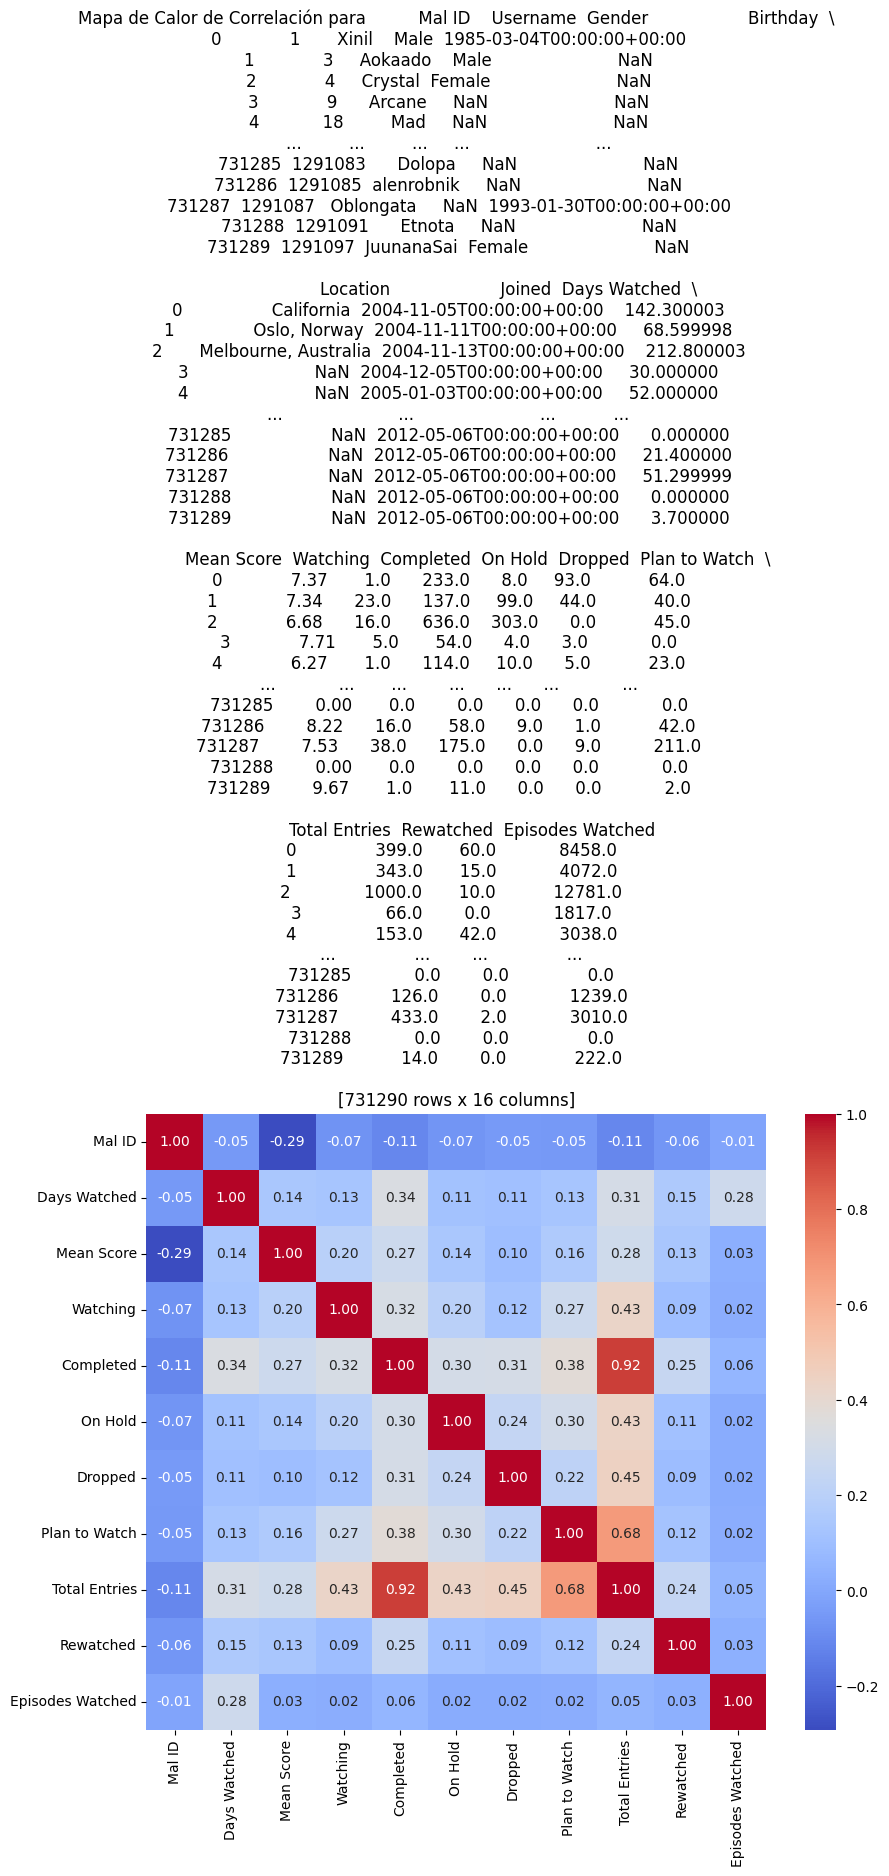

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = users_details_2023.select_dtypes(include= ['int64', 'int32', 'float64', 'float32'])
if df_numeric.shape[1] > 1: # Solo si hay al menos 2 columnas numéricas para calcular correlación
      plt.figure(figsize=(10, 8))
      sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
      plt.title('Mapa de Calor de Correlación para users_details_2023')
      plt.show()
else:
    print(f"El dataset '{users_details_2023}' no tiene suficientes columnas numéricas para un mapa de calor de correlación.")



En el mapa de calor de el dataset users_details_2023, se puede observar una gran correlación entre las tablas completed y total entries, lo cual nos indica que la mayoria de los animes vistos por los usuarios estan completados. Aunque también existe una correlación entre total entries y dropped, lo que nos indica que los usuarios dejan de ver muchos animes de los cuales empiezan a ver, ya sea porque no va con su preferencia o por otros factores.

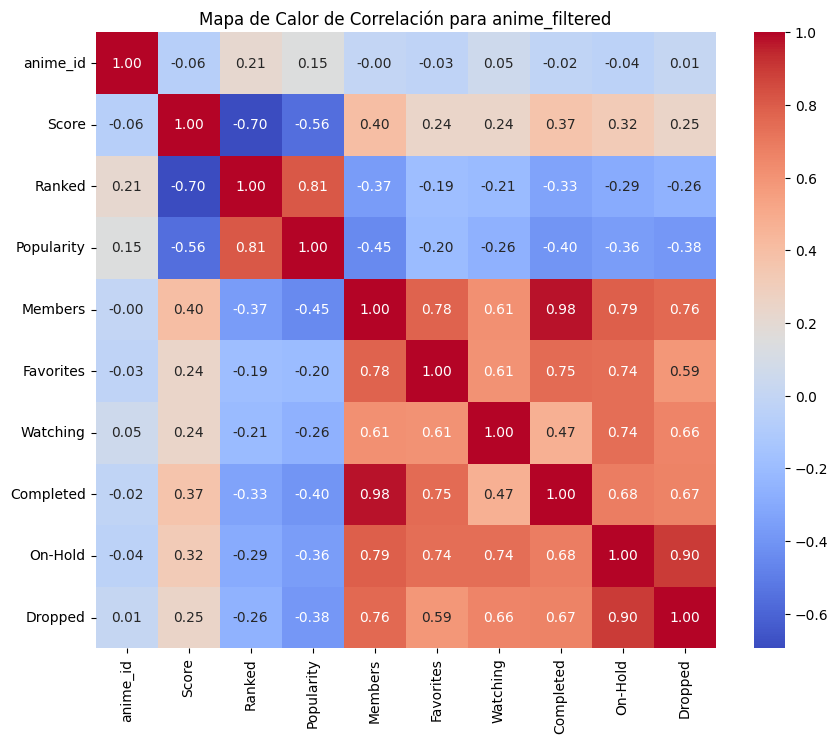

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = anime_filtered.select_dtypes(include= ['int64', 'int32', 'float64', 'float32'])
if df_numeric.shape[1] > 1: # Solo si hay al menos 2 columnas numéricas para calcular correlación
      plt.figure(figsize=(10, 8))
      sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
      plt.title('Mapa de Calor de Correlación para anime_filtered') # Modified title
      plt.show()
else:
    print(f"El dataset 'anime_filtered' no tiene suficientes columnas numéricas para un mapa de calor de correlación.")

* Se puede observar una correlación negativa entre score y ranked (-0.70), esto se debe a que entre mejor es la puntuación del anime, este tiende a obtener un numero menor en ranked.

* Existe una correlación negativa entre popularity y score (-0.56). Lo cual, nos indica que a pesar de que un anime sea popular, no significa que sea bueno o del agrado de los usuarios, teniendo críticas mixtas.

* No existe una gran correlación entre favorites y score, lo que puede indicar que existen usuarios que tienen animes favoritos, pero que no tienen un gran puntaje. Ya sea, por temas de gustos o nostalgia en general.

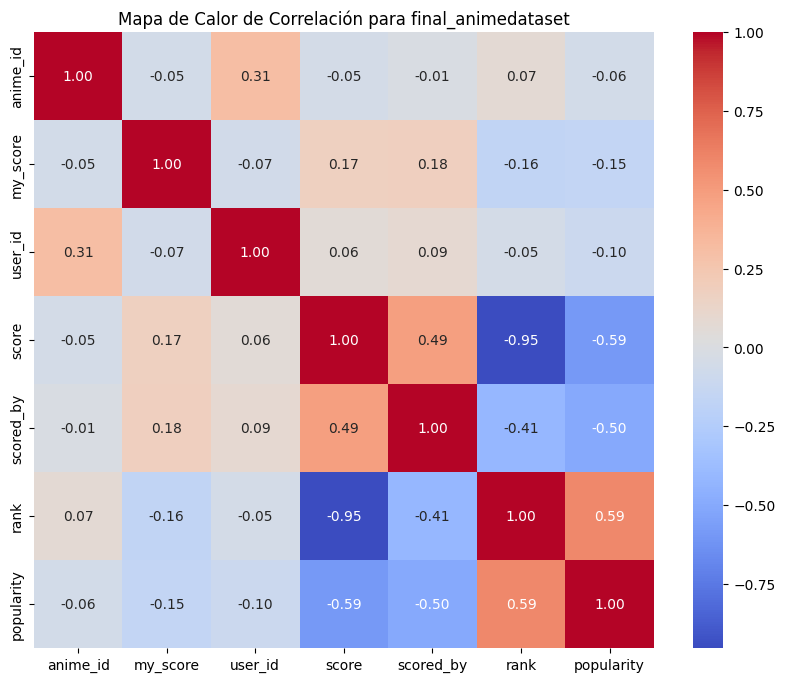

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = final_animedataset.select_dtypes(include= ['int64', 'int32', 'float64', 'float32'])
if df_numeric.shape[1] > 1: # Solo si hay al menos 2 columnas numéricas para calcular correlación
      plt.figure(figsize=(10, 8))
      sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
      plt.title('Mapa de Calor de Correlación para final_animedataset') # Modified title
      plt.show()
else:
    print(f"El dataset 'final_animedataset' no tiene suficientes columnas numéricas para un mapa de calor de correlación.")

Se puede observar que existe una correlación mediana entre popularidad y ranking de un anime. Esto, nos puede indicar que mientras mejor ranking tenga un anime, más popular será, aunque no siempre se aplica.

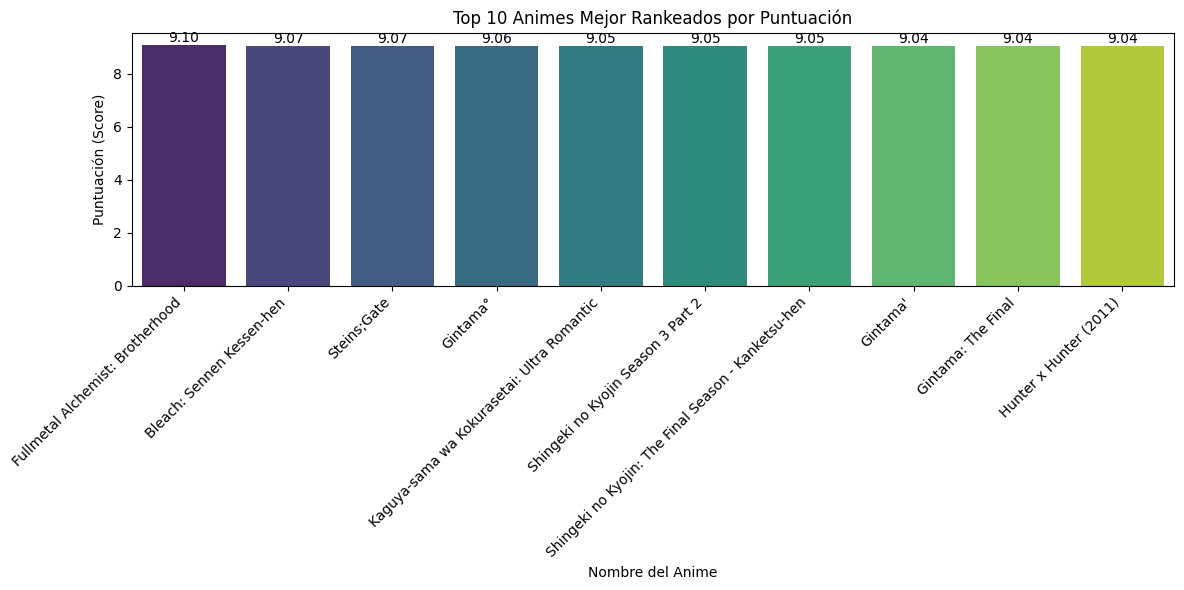

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filtrar el dataset para excluir animes con Score 'UNKNOWN' y Rank 'UNKNOWN'
ranked_anime = anime_dataset_2023[anime_dataset_2023['Score'] != 'UNKNOWN'].copy()
ranked_anime = ranked_anime[ranked_anime['Rank'] != 'UNKNOWN'].copy()


# 2. Convertir las columnas 'Score' y 'Rank' a numérico
ranked_anime['Score'] = pd.to_numeric(ranked_anime['Score'])
ranked_anime['Rank'] = pd.to_numeric(ranked_anime['Rank'])


# 3. Ordenar por la columna 'Rank' de forma ascendente
ranked_anime = ranked_anime.sort_values(by='Rank', ascending=True)

# 4. Seleccionar los top 10 animes mejor rankeados
top_10_ranked = ranked_anime.head(10)

# 5. Crear un gráfico de barras
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Name', y='Score', data=top_10_ranked, palette='viridis', hue='Name', legend=False) # Fix: Added hue and legend=False
plt.title('Top 10 Animes Mejor Rankeados por Puntuación')
plt.xlabel('Nombre del Anime')
plt.ylabel('Puntuación (Score)')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje x para mejor legibilidad

# Agregar el valor de Score encima de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se corten
plt.show()

El siguiente codigo nos muestra el top 10 de animes mejor rankeados por puntuación dentro del dataset anime_dataset_2023. Cada barra representa un anime y encima su puntuación, como podemos observar están muy parejos entre si y solo se diferencian por decimales.

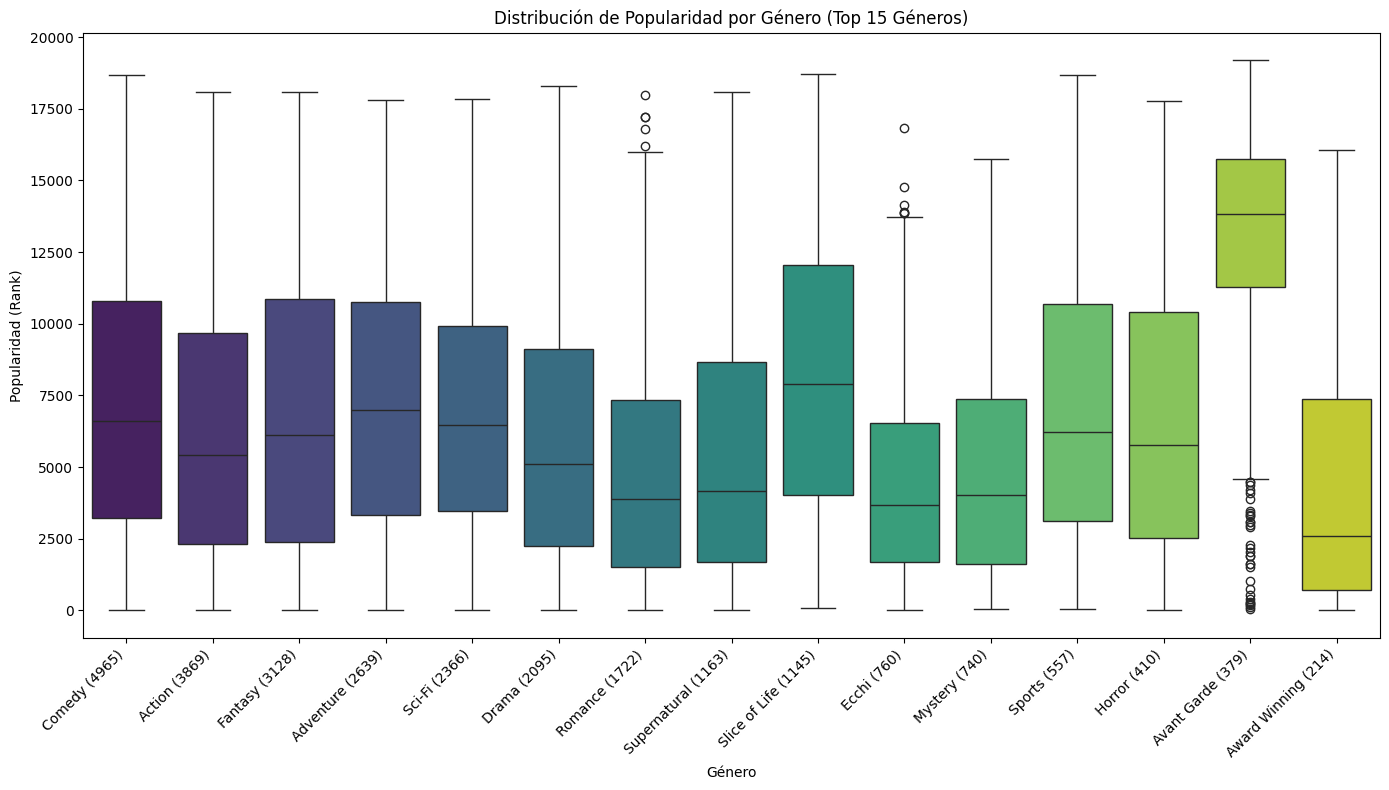

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarnos de trabajar con una copia para evitar SettingWithCopyWarning
anime_genres = anime_dataset_2023.copy()

# Limpiar los valores 'UNKNOWN' en las columnas relevantes
anime_genres = anime_genres[anime_genres['Rank'] != 'UNKNOWN'].copy()
anime_genres = anime_genres[anime_genres['Popularity'] != 'UNKNOWN'].copy()
anime_genres = anime_genres[anime_genres['Genres'] != 'UNKNOWN'].copy()
anime_genres = anime_genres[anime_genres['Score'] != 'UNKNOWN'].copy() # También limpiar Score por si acaso

# Convertir las columnas a tipo numérico
anime_genres['Rank'] = pd.to_numeric(anime_genres['Rank'])
anime_genres['Popularity'] = pd.to_numeric(anime_genres['Popularity'])
anime_genres['Score'] = pd.to_numeric(anime_genres['Score'])


# Dividir la cadena de géneros y expandir las filas
anime_genres['Genres'] = anime_genres['Genres'].str.split(', ')
anime_genres_expanded = anime_genres.explode('Genres')

# Contar la frecuencia de cada género
genre_counts = anime_genres_expanded['Genres'].value_counts()

# Seleccionar los N géneros más comunes para visualizar (ej. top 15)
top_genres = genre_counts.head(15).index.tolist()

# Filtrar el DataFrame expandido para incluir solo los géneros principales
anime_top_genres = anime_genres_expanded[anime_genres_expanded['Genres'].isin(top_genres)].copy()

# Crear etiquetas con el nombre del género y la cantidad
genre_labels = [f'{genre} ({genre_counts[genre]})' for genre in top_genres]

# Reordenar el DataFrame para que coincida con el orden de las etiquetas
anime_top_genres['Genres'] = pd.Categorical(anime_top_genres['Genres'], categories=top_genres, ordered=True)
anime_top_genres = anime_top_genres.sort_values('Genres')


# Crear un box plot para visualizar la distribución de popularidad por género
plt.figure(figsize=(14, 8))
# Fix: Added hue='Genres' and legend=False to address FutureWarning
sns.boxplot(x='Genres', y='Popularity', data=anime_top_genres, palette='viridis', hue='Genres', legend=False)
plt.title('Distribución de Popularidad por Género (Top 15 Géneros)')
plt.xlabel('Género')
plt.ylabel('Popularidad (Rank)') # Menor número = Más popular
plt.xticks(ticks=range(len(genre_labels)), labels=genre_labels, rotation=45, ha='right') # Usar etiquetas personalizadas
plt.tight_layout()
plt.show()

# Opcional: También puedes visualizar la distribución del Score por género
# plt.figure(figsize=(14, 8))
# sns.boxplot(x='Genres', y='Score', data=anime_top_genres, palette='viridis')
# plt.title('Distribución de Puntuación por Género (Top 15 Géneros)')
# plt.xlabel('Género')
# plt.ylabel('Puntuación (Score)')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

El siguiente gráfico nos muestra la distribución de popularidad de los animes en función al género que poseen. Estos datos nos ayudarán a entender mejor las preferencias de los usuarios y tendencian que existen dentro de la industria del anime.